## Simulated annealing

Simulated annealing is an optimization technique designed to approximate a globally optimal solution to a given problem. A simple example of such a problem is finding a global maximum or minimum of a function.

The method is closely related to the Metropolis algorithm.
Recall that for zero temperature $T = 0$ we would never move to a state with a higher energy in the Metropolis algorithm, but would eventually be stuck in a state which minimizes the energy.
However, if our set of moves only allows us to move to neihgboring microstates, we may end up being stuck in a local minimum as opposed to the global minimum.
This issue is less relevant at finite temperature $T > 0$, since there is always a chance to get out of the local minimum by accepting occasionally a move to a state with higher energy.

This logic can be applied to finding the minimum of a function.
We probe different values of $x$. For $T = 0$ we would always only accept a state with a lower value of $f(x)$, thus ending up in at least a local minimum.
For $T > 0$, however, we will have also the possibility to explore a broader range of $x$ values, and possibly moving away from a local minimum to the global one.

We start out with a large value of $T$ which will allow us to cover initially a broad range of possibilities for finding the minimum.
Eventually we will want to narrow down our search which can be achieved by lowering the temperature and thus prereferably accepting values which tend to minimize the function more.
Eventually, the temperature can be set to zero to narrow down to a single minimum.

The method is not guaranteed converge to the exact global minimum but can yield good approximate solution if the method of choosing candidates moves and the cooling schedule (the decrease of $T$ with time) are chosen appriately for the problem at hand.

$$\beta = \frac{1}{T}$$

## Function minimum

Let us consider the following function as an example,
$$
f(x) = x^2 - \cos(4\pi x)
$$
which has several local minima

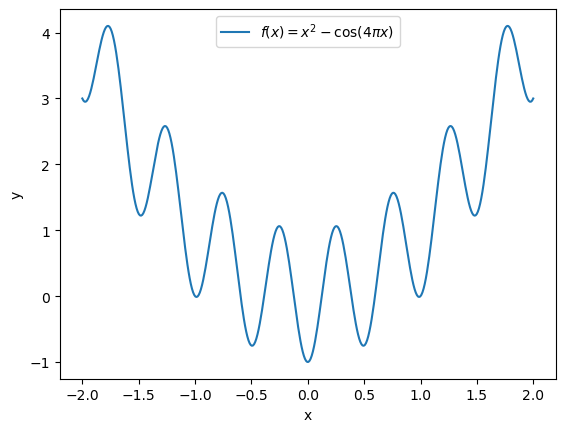

In [259]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - np.cos(4*np.pi*x)
flabel = "${f(x) = x^2 - \cos(4\pi x)}$"

xplot = np.linspace(-2,2,400)
yplot = f(xplot)

plt.plot(xplot,yplot, label=flabel)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

The global minimum is at $x = 0$, but also many local minima are present.
Standard algorithms can thus end up in a local minimum instead of a global one.

In the simulated annealing procedure we will randomly pick a new value of $x_{\rm cand}$.
We will consider $x_{\rm cand}$ in the neighborhood of $x$, for instance, by sampling from Gaussian distribution with $\sigma = 1$ (the value of sigma can be varied).
The new value $x_{\rm cand}$ will be accepted with a probability from the Metropolis method
$$
p_{a} = e^{-[f(x_{\rm cand}) - f(x)]/T}~.
$$

The cooling schedule is chosen in the exponential form
$$
T_n = T_{\rm max} e^{-n/\tau}.
$$
The process proceeds until the temperature decreases below a certain threshold $T_{\rm min}$.

In [241]:
# A single step of the simulated annealing process at temperature T
# for finding the minimum of a function f(x)
# The candidate move xcand is sampled from a Gaussian distribution
# around the present value of x, with a condition xmin <= xcand <= xmax
# The move is accepted with the Metropolis based probability
def simulated_annealing_step(f, T, x, sigma, xmin = -1e9, xmax = 1e9):
    fnow = f(x)
    xcand = np.random.normal(x,sigma)
    while (xcand < xmin or xcand > xmax):
        xcand = np.random.normal(x,sigma)
    fcand = f(xcand)
    if (fcand < fnow or (T>0 and np.random.rand() < np.exp(-(fcand-fnow)/T))):
        return xcand
    else:
        return x

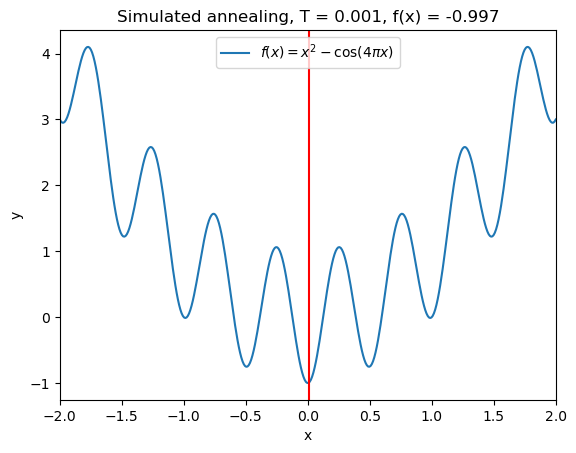

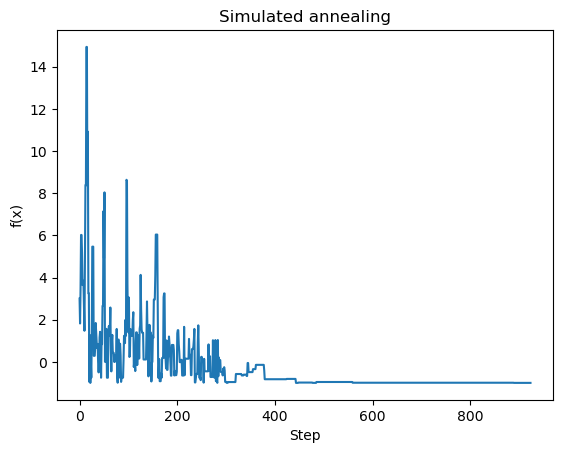

In [278]:
# Let us take our function and try to find its minimum
# with simulated annealing
def f(x):
    return x**2 - np.cos(4*np.pi*x)
flabel = "${f(x) = x^2 - \cos(4\pi x)}$"

# We shall visualize the process
x = 2
sigma = 1.
Tmin = 1.e-3
Tmax = 10.
T = Tmax
t = 0
tau = 100.

fs = [f(x)]

while (T > Tmin):
    T = Tmax * np.exp(-t/tau)
    x = simulated_annealing_step(f, T, x, sigma)
    t += 1
    fs.append(f(x))
    if (t%10 == 0):
        clear_output(wait=True)
        time.sleep(0.1)
        plt.title("Simulated annealing, T = " + '{0:.3f}'.format(T) + ", f(x) = " + '{0:.3f}'.format(f(x)))
        plt.plot(xplot,yplot, label=flabel)
        plt.xlim(-2,2)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.axvline(x,color='r')
        plt.legend()
        plt.show()
        
plt.title("Simulated annealing")
plt.plot(fs, label=flabel)
plt.xlabel("Step")
plt.ylabel("f(x)")
plt.show()

Another example
$$
f(x) = \cos(x) + \cos(\sqrt{2}x) + \cos(\sqrt{3}x)
$$

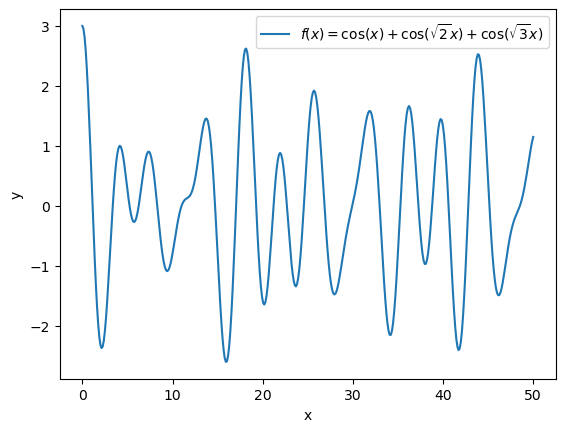

In [280]:
def f(x):
    return np.cos(x) + np.cos(np.sqrt(2)*x) + np.cos(np.sqrt(3)*x)

flabel = "${f(x) = \cos(x) + \cos(\sqrt{2}x) + \cos(\sqrt{3}x)}$"

xplot = np.linspace(0,50,400)
yplot = f(xplot)

plt.plot(xplot,yplot, label=flabel)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Let us try to find the global one with simulated annealing in range $x \in [0,50]$.

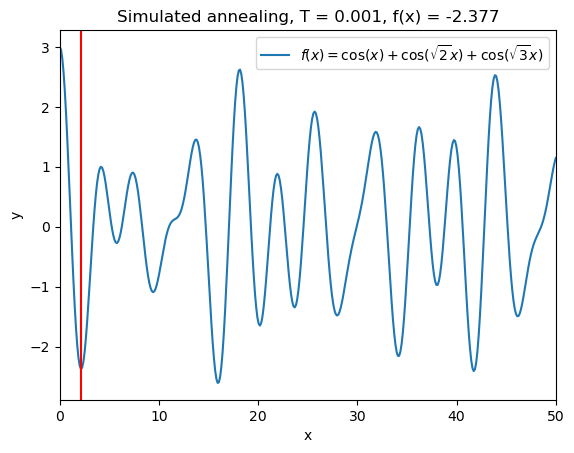

In [284]:
x = 50 * np.random.rand()
sigma = 5.
Tmin = 1.e-3
Tmax = 10.
T = Tmax
t = 0
tau = 100.

while (T > Tmin):
    T = Tmax * np.exp(-t/tau)
    x = simulated_annealing_step(f, T, x, sigma, 0, 50)
    #print(T," ",x," ",f(x))
    # sigma *= np.exp(-1./tau)
    t += 1
    if (t%10 == 0):
        clear_output(wait=True)
        time.sleep(0.1)
        plt.title("Simulated annealing, T = " + '{0:.3f}'.format(T) + ", f(x) = " + '{0:.3f}'.format(f(x)))
        plt.plot(xplot,yplot, label=flabel)
        plt.xlim(0,50)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.axvline(x,color='r')
        plt.legend()
        plt.show()

## Percolation threshold

Percolation theory studies the formation of long-range connectivity in random systems.
Discrete percolation can be considered on a lattice, where each site can be either free or occuppied, and connected to neighboring sites. In continuum percolation one fills available space with overlapping object that can overlap and bond into clusters.

Above a certain occupation threshold -- called percolation threshold $0 < p_c < 1$ there exists a giant connected component of order of system size, while below it it does not.
In practice the connected component may correspond to fluid flow through a porous medium, or an electrically conductive admixture.

Near $p = p_c$ the system can exhibit many interesting phenomena similar to critical phenomena near the critical point.

## Square lattice percolation

In square lattice percolation one has an $N$x$N$ grid where each site is occupied with a probability $p$ and the neighboring occupied sites can form a cluster.

We can estimate the percolation threshold $p_c$ through Monte Carlo modeling.
There are two strategies we can employ:
- Consider different values of $p$. For every given $p$ label each site with probability $p$ to be occupied. Then use cluster-finding algorithm and see if a percolating cluster (for instance one that runs all the way from top to bottom of the grid) is formed. For large enough $N$ we expect that percolating cluster forms for $p > p_c$ and does not form for $p < p_c$.
- Randomly pick unoccupied site and mark it as occupied. Check if a percolating cluster is found. If not, repeat the process by labeling a new unoccupied site as occupied until a percolating cluster is formed. We expect the percolating cluster to form when the ratio of occupied sites to the total number of sites is of order $p_c$.

Let us implement the 2nd strategy. For efficient cluster finding we will use the [union-find data structure](https://en.wikipedia.org/wiki/Disjoint-set_data_structure).

In [11]:
# Class implementing the union-find structure with a 2D (x,y) index
# This will also store the minimum and maximum y (vertical) coordinate of each set
class UnionFind:
    def __init__(self, N):
        self.N = N
        self.parent = list(range(N**2))
        self.rank = [0] * N**2
        self.maxy = [0] * N**2
        self.miny = [0] * N**2
        for x in range(N):
            for y in range (N):
                ind = self.index(x,y)
                self.maxy[ind] = y
                self.miny[ind] = y

    def index(self, x, y):
        return self.N * x + y
    
    def findxy(self, x, y):
        return self.find(self.index(x,y))
                
    def find(self, ind):
        if self.parent[ind] != ind:
            self.parent[ind] = self.find(self.parent[ind])
        return self.parent[ind]
    
    def unionxy(self, x1, y1, x2, y2):
        self.union(self.index(x1,y1), self.index(x2,y2))

    def union(self, ind1, ind2):
        root_1 = self.find(ind1)
        root_2 = self.find(ind2)

        if root_1 == root_2:
            return

        if self.rank[root_1] > self.rank[root_2]:
            self.maxy[root_1] = max(self.maxy[root_1], self.maxy[root_2])
            self.miny[root_1] = min(self.miny[root_1], self.miny[root_2])
            self.parent[root_2] = root_1
        else:
            self.maxy[root_2] = max(self.maxy[root_1], self.maxy[root_2])
            self.miny[root_2] = min(self.miny[root_1], self.miny[root_2])
            self.parent[root_1] = root_2
            if self.rank[root_1] == self.rank[root_2]:
                self.rank[root_2] += 1

In [100]:
import numpy as np
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plotSimulation = True

## Simulate percolation threshold on a square in 2D
## Return the fraction of occupied cells at percolation
def simulateSquarePercolation(N):
    cells = np.zeros([N,N])
    occupied = 0
    uf = UnionFind(N)
    while True:
        # Choose unoccupied cell to occupy
        while True:
            ind = np.random.randint(N**2)
            x = ind // N
            y = ind % N
            if (cells[x][y] == 0):
                break
        cells[x][y] = 1
        occupied += 1
        
        # Add the new cell to existing clusters
        if (x > 0 and cells[x-1][y] == 1):
            uf.unionxy(x,y,x-1,y)
        if (x < N - 1 and cells[x+1][y] == 1):
            uf.unionxy(x,y,x+1,y)
        if (y > 0 and cells[x][y-1] == 1):
            uf.unionxy(x,y,x,y-1)
        if (y < N - 1 and cells[x][y+1] == 1):
            uf.unionxy(x,y,x,y+1)
        
        ymin = uf.miny[uf.find(ind)]
        ymax = uf.maxy[uf.find(ind)]
        
        # plot the data points
        if plotSimulation:
            toPlot = False
            # Percolating cluster found
            if (ymin == 0 and ymax == N-1):
                indperc = uf.find(ind)
                for x in range(N):
                    for y in range(N):
                        if (uf.findxy(x,y) == indperc):
                            cells[x][y] = 2
                toPlot = True
            
            if (occupied%1000 == 0):
                toPlot = True
            
            if (toPlot):
                clear_output(wait=True)
                # time.sleep(0.01)
                plt.title("Square percolation, ${p = }$" + '{0:.3f}'.format(occupied / N**2))
                plt.xlabel("x")
                plt.ylabel("y")
                cmap = ListedColormap(['w', 'black', 'red'])
                CS = plt.imshow(cells.T, vmax=2, vmin=0,origin="lower",extent=[0,N,0,N], cmap=cmap,  interpolation='nearest')
                # plt.colorbar(CS)
                plt.show()
        
        # Check if percolating cluster is found
        if (ymin == 0 and ymax == N-1):     
            return occupied / N**2

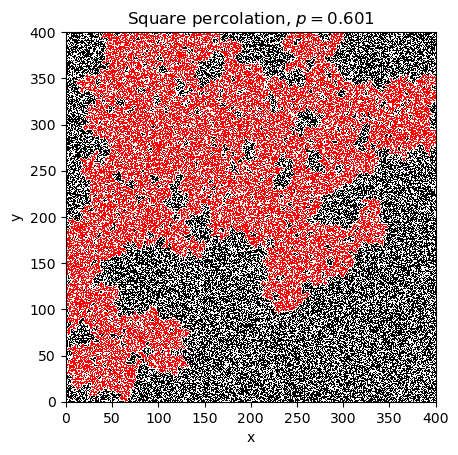

0.600725

In [109]:
plotSimulation = True
simulateSquarePercolation(400)

In [85]:
# Simulate square NxN percolation M times
# Returns average and the error estimate for pc
def simulateSquarePercolationAverage(N, M):
    total = 0
    totalsq = 0
    for i in range(M):
        p = simulateSquarePercolation(N)
        total += p
        totalsq += p**2
        
    p_av = total / M
    p2_av = totalsq / M
    
    return p_av, np.sqrt((p2_av - p_av**2)/N)

In [91]:
%%time

N = 10
M = 10000
plotSimulation = False

pc, pc_err = simulateSquarePercolationAverage(N,M)
print("Simulating square percolation")
print("NxN = ",N,"x",N," with M =",M, "samples")
print("p_c = ", pc, "+-", pc_err)

Simulating square percolation
NxN =  10 x 10  with M = 10000 samples
p_c =  0.5905830000000054 +- 0.023061418236939468
CPU times: user 3.04 s, sys: 37.5 ms, total: 3.08 s
Wall time: 3.08 s


## Simulated annealing

Simulated annealing is an optimization technique designed to approximate a globally optimal solution to a given problem. A simple example of such a problem is finding a global maximum or minimum of a function.

The method is closely related to the Metropolis algorithm.
Recall that for zero temperature $T = 0$ we would never move to a state with a higher energy in the Metropolis algorithm, but would eventually be stuck in a state which minimizes the energy.
However, if our set of moves only allows us to move to neihgboring microstates, we may end up being stuck in a local minimum as opposed to the global minimum.
This issue is less relevant at finite temperature $T > 0$, since there is always a chance to get out of the local minimum by accepting occasionally a move to a state with higher energy.

This logic can be applied to finding the minimum of a function.
We probe different values of $x$. For $T = 0$ we would always only accept a state with a lower value of $f(x)$, thus ending up in at least a local minimum.
For $T > 0$, however, we will have also the possibility to explore a broader range of $x$ values, and possibly moving away from a local minimum to the global one.

## Function minimum

Let us consider the following function as an example,
$$
f(x) = x^2 - \cos(4\pi x)
$$
which has several local minima

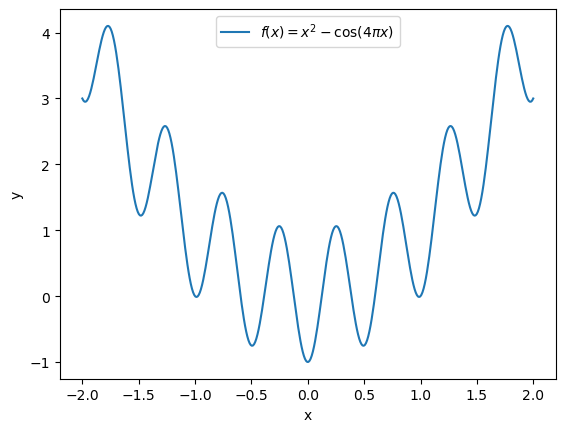

In [207]:
def f(x):
    return x**2 - np.cos(4*np.pi*x)
flabel = "${f(x) = x^2 - \cos(4\pi x)}$"

xplot = np.linspace(-2,2,400)
yplot = f(xplot)

plt.plot(xplot,yplot, label=flabel)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

The global minimum is at $x = 0$, but also many local minima are present.
Standard algorithms can thus end up in a local minimum instead of a global one.

In [208]:
def simulated_annealing_step(f, T, x, sigma, xmin = -1000, xmax = 1000):
    fnow = f(x)
    xcand = np.random.normal(x,sigma)
    while (xcand < xmin or xcand > xmax):
        xcand = np.random.normal(x,sigma)
    fcand = f(xcand)
    if (fcand < fnow or (T>0 and np.random.rand() < np.exp(-(fcand-fnow)/T))):
        return xcand
    else:
        return x

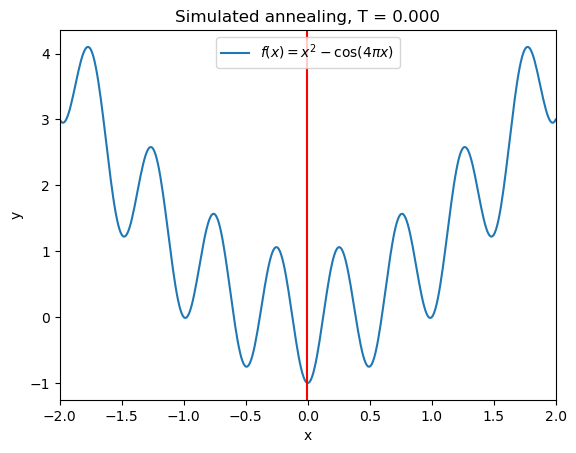

In [209]:
x = 2
sigma = 1.
Tmin = 1.e-4
Tmax = 10.
T = Tmax
t = 0
tau = 100.

while (T > Tmin):
    T = Tmax * np.exp(-t/tau)
    x = simulated_annealing_step(f, T, x, sigma)
    #print(T," ",x," ",f(x))
    # sigma *= np.exp(-1./tau)
    t += 1
    if (t%10 == 0):
        clear_output(wait=True)
        time.sleep(0.1)
        plt.title("Simulated annealing, T = " + '{0:.3f}'.format(T))
        plt.plot(xplot,yplot, label=flabel)
        plt.xlim(-2,2)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.axvline(x,color='r')
        plt.legend()
        plt.show()

Another example
$$
f(x) = \cos(x) + \cos(\sqrt{2}x) + \cos(\sqrt{3}x)
$$

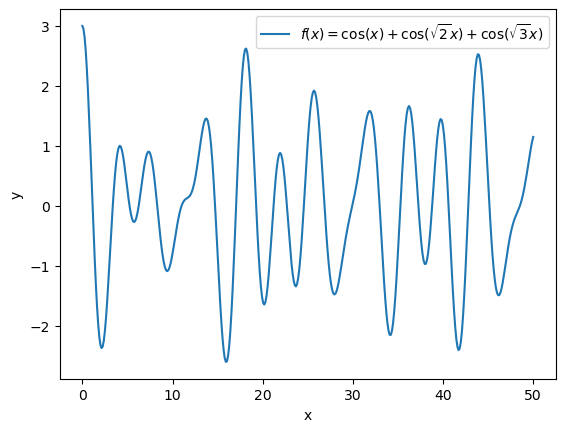

In [210]:
def f(x):
    return np.cos(x) + np.cos(np.sqrt(2)*x) + np.cos(np.sqrt(3)*x)

flabel = "${f(x) = \cos(x) + \cos(\sqrt{2}x) + \cos(\sqrt{3}x)}$"

xplot = np.linspace(0,50,400)
yplot = f(xplot)

plt.plot(xplot,yplot, label=flabel)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

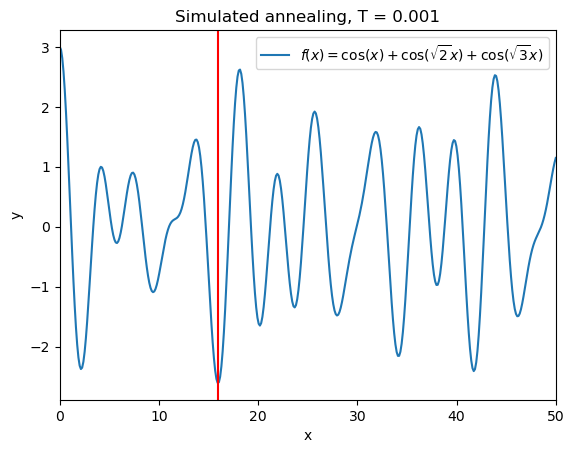

In [218]:
x = 42
sigma = 5.
Tmin = 1.e-3
Tmax = 10.
T = Tmax
t = 0
tau = 100.

while (T > Tmin):
    T = Tmax * np.exp(-t/tau)
    x = simulated_annealing_step(f, T, x, sigma, 0, 50)
    #print(T," ",x," ",f(x))
    # sigma *= np.exp(-1./tau)
    t += 1
    if (t%10 == 0):
        clear_output(wait=True)
        time.sleep(0.1)
        plt.title("Simulated annealing, T = " + '{0:.3f}'.format(T))
        plt.plot(xplot,yplot, label=flabel)
        plt.xlim(0,50)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.axvline(x,color='r')
        plt.legend()
        plt.show()